# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [3]:
data=pd.read_excel("./data/Telco_customer_churn.xlsx")
df=data.copy()

In [4]:
df.sample(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1909,3957-SQXML,1,United States,California,Los Angeles,90068,"34.137411, -118.328915",34.137411,-118.328915,Female,...,Two year,No,Credit card (automatic),24.95,894.3,No,0,62,5408,NaN
1384,3235-ETOOB,1,United States,California,Lakeside,92040,"32.909873, -116.906774",32.909873,-116.906774,Male,...,Month-to-month,Yes,Electronic check,74.50,609.9,Yes,1,88,3683,Competitor offered higher download speeds
4034,8059-UDZFY,1,United States,California,Lucerne,95458,"39.141934, -122.770679",39.141934,-122.770679,Female,...,Month-to-month,Yes,Bank transfer (automatic),105.35,3465.05,No,0,58,4738,NaN
6167,2077-MPJQO,1,United States,California,Menlo Park,94025,"37.449551, -122.183762",37.449551,-122.183762,Male,...,Month-to-month,Yes,Electronic check,75.40,533.05,No,0,41,3533,NaN
2949,8205-MQUGY,1,United States,California,Sacramento,95834,"38.646209, -121.52446",38.646209,-121.524460,Male,...,Month-to-month,Yes,Electronic check,49.20,571.15,No,0,37,3582,NaN
2984,5799-JRCZO,1,United States,California,North San Juan,95960,"39.423046, -120.984472",39.423046,-120.984472,Female,...,Two year,No,Credit card (automatic),19.50,1215.1,No,0,44,4370,NaN
3597,7874-ECPQJ,1,United States,California,Wofford Heights,93285,"35.690535, -118.552784",35.690535,-118.552784,Female,...,Month-to-month,Yes,Bank transfer (automatic),20.05,85.5,No,0,57,4462,NaN
4322,9139-TWBAS,1,United States,California,Los Angeles,90014,"34.043144, -118.251977",34.043144,-118.251977,Female,...,One year,No,Bank transfer (automatic),47.85,1190.5,No,0,79,4362,NaN
4434,4840-ORQXB,1,United States,California,Sierra Madre,91024,"34.168686, -118.057505",34.168686,-118.057505,Female,...,Month-to-month,No,Electronic check,104.75,5841.35,No,0,35,5128,NaN
638,3325-FUYCG,1,United States,California,Five Points,93624,"36.397745, -120.119911",36.397745,-120.119911,Male,...,One year,No,Electronic check,106.10,2847.4,Yes,1,85,3770,Service dissatisfaction


In [5]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [6]:
thresh_1=0.4*len(df)
# Drop columns with 60% null values
df.dropna(axis=1,inplace=True,thresh=thresh_1)

In [7]:
df.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

In [8]:
df.shape

(7043, 32)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# Data Cleaning&EDA

In [11]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
dtype: int64

In [12]:
# Drop col with 1 unique value or very large unique values almost descripe each entity
df.drop(columns=['CustomerID','Count','Country','State'],inplace=True)

In [13]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce') # object col should be numeric
df['Total Charges'] = df['Total Charges'].fillna(0)

In [14]:
import os

save_dir = "./app/static/visualizations"
os.makedirs(save_dir, exist_ok=True)

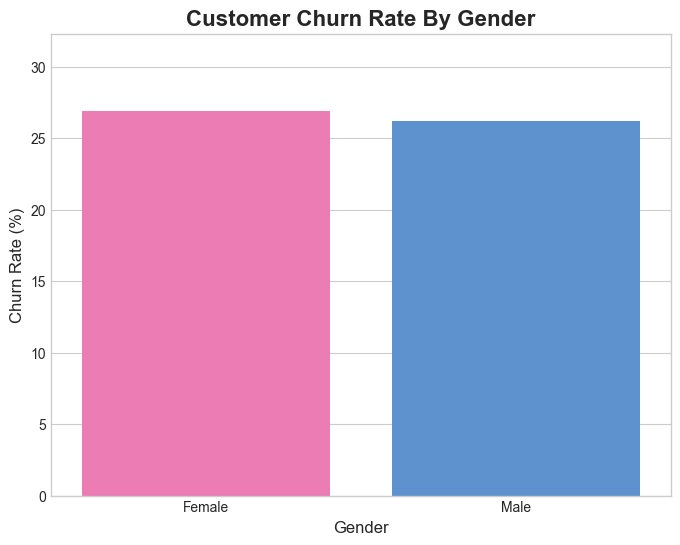

In [15]:
churn_by_gender = df.groupby('Gender')['Churn Value'].value_counts(normalize=True).unstack()
churn_rate = churn_by_gender[1] * 100

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

bars = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette=['#FF69B4', '#4A90E2'], ax=ax)

ax.set_title('Customer Churn Rate By Gender', fontsize=16, fontweight='bold')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_ylim(0, churn_rate.max() * 1.2)

plt.savefig(os.path.join(save_dir, "customer_churn_rate_by_gender.png"), dpi=300, bbox_inches='tight')
plt.show()

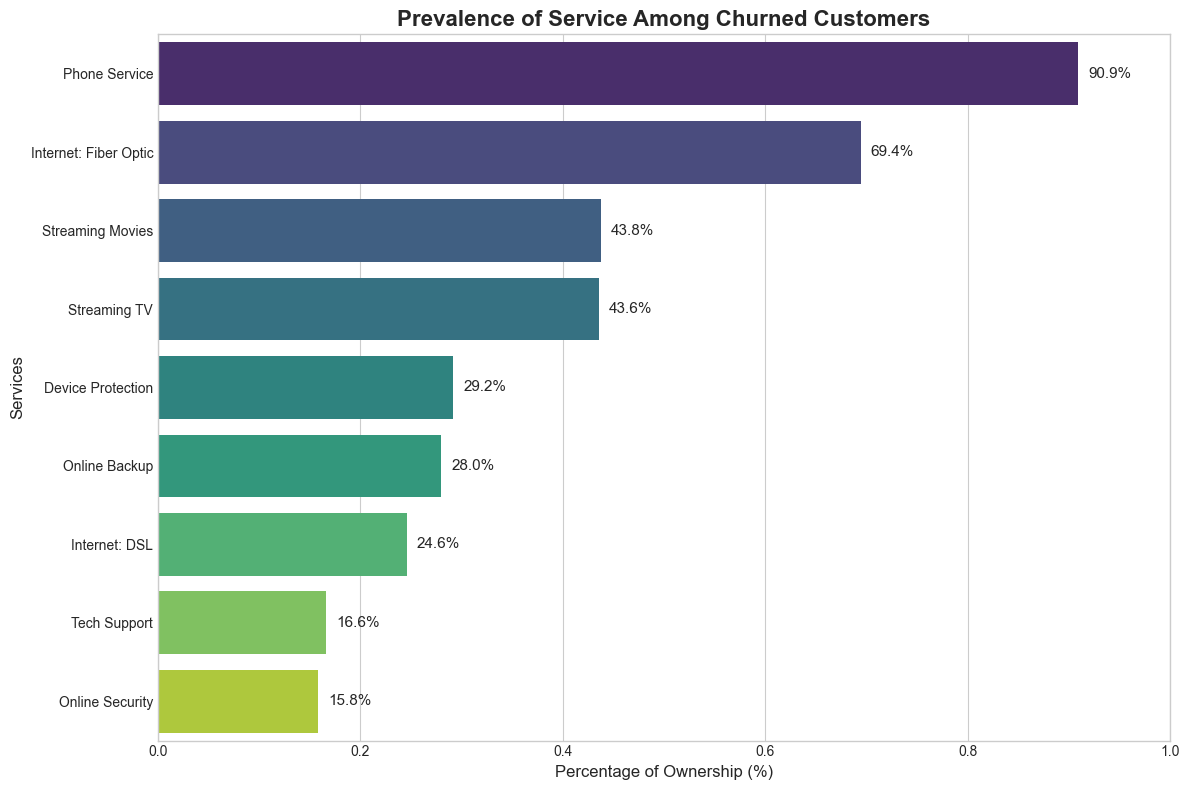

In [16]:
df_churn = df[df['Churn Value'] == 1].copy()

service_prevalence = {}

service_prevalence['Phone Service'] = (df_churn['Phone Service'] == 'Yes').mean()
service_prevalence['Internet: Fiber Optic'] = (df_churn['Internet Service'] == 'Fiber optic').mean()
service_prevalence['Internet: DSL'] = (df_churn['Internet Service'] == 'DSL').mean()
service_prevalence['Streaming TV'] = (df_churn['Streaming TV'] == 'Yes').mean()
service_prevalence['Streaming Movies'] = (df_churn['Streaming Movies'] == 'Yes').mean()
service_prevalence['Device Protection'] = (df_churn['Device Protection'] == 'Yes').mean()
service_prevalence['Online Backup'] = (df_churn['Online Backup'] == 'Yes').mean()
service_prevalence['Tech Support'] = (df_churn['Tech Support'] == 'Yes').mean()
service_prevalence['Online Security'] = (df_churn['Online Security'] == 'Yes').mean()
service_df = pd.DataFrame(list(service_prevalence.items()), columns=['Service', 'Prevalence'])
service_df = service_df.sort_values(by='Prevalence', ascending=False)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Prevalence', y='Service', data=service_df, palette='viridis')

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.01,
            p.get_y() + p.get_height() / 2,
            f'{width:.1%}',
            va='center',
            fontsize=11)

plt.title('Prevalence of Service Among Churned Customers', fontsize=16, fontweight='bold')
plt.xlabel('Percentage of Ownership (%)', fontsize=12)
plt.ylabel('Services', fontsize=12)
plt.xlim(0, 1)
plt.tight_layout()

plt.savefig(os.path.join(save_dir, "prevalence_of_service_among_churned_customers.png"), dpi=300, bbox_inches='tight')
plt.show()

#### The majority of users who churn are telephone service customers.

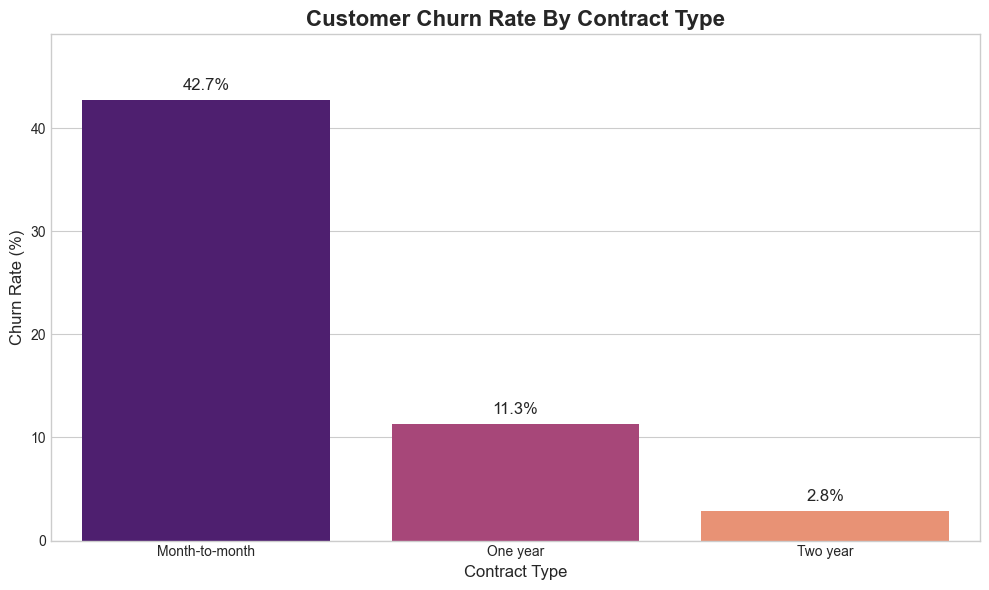

In [17]:
churn_by_contract = df.groupby('Contract')['Churn Value'].mean() * 100
    
churn_by_contract = churn_by_contract.sort_values(ascending=False).reset_index()
churn_by_contract.rename(columns={'Churn Value': 'Churn Rate (%)'}, inplace=True)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Contract', y='Churn Rate (%)', data=churn_by_contract, palette='magma')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 1,
            f'{height:.1f}%',
            ha="center",
            fontsize=12)

ax.set_title('Customer Churn Rate By Contract Type', fontsize=16, fontweight='bold')
ax.set_xlabel('Contract Type', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_ylim(0, churn_by_contract['Churn Rate (%)'].max() * 1.15)

plt.tight_layout()
plt.savefig(os.path.join(save_dir, "customer_churn_rate_by_contract_type.png"), dpi=300, bbox_inches='tight')
plt.show()

#### Customers on Monthly contracts have more churn percentage

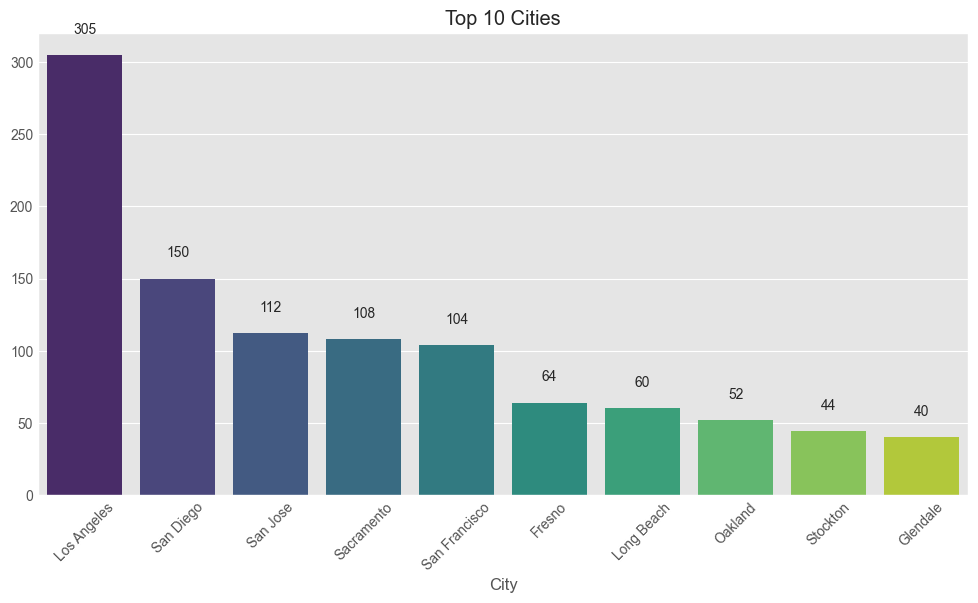

In [18]:
top_10_Cities = df.City.value_counts().head(10)

plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.barplot(x=top_10_Cities.index, y=top_10_Cities.values, palette='viridis')  
plt.title('Top 10 Cities')
plt.xlabel('City')
for i, count in enumerate(top_10_Cities.values):
    plt.text(i, count + 15, str(count), ha='center')  
plt.xticks(rotation=45)
plt.savefig(os.path.join(save_dir, "top_10_cities.png"), dpi=300, bbox_inches='tight')
plt.show()

#### The majority of customer churn comes from Los Angeles

In [19]:
df.nunique().sort_values(ascending=False)

Total Charges        6531
CLTV                 3438
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Monthly Charges      1585
City                 1129
Churn Score            85
Tenure Months          73
Payment Method          4
Multiple Lines          3
Contract                3
Streaming Movies        3
Streaming TV            3
Tech Support            3
Device Protection       3
Internet Service        3
Online Backup           3
Online Security         3
Phone Service           2
Dependents              2
Senior Citizen          2
Partner                 2
Gender                  2
Paperless Billing       2
Churn Value             2
Churn Label             2
dtype: int64

In [20]:
# Drop col with high number of unique values
# Drop col related to target variable Avoid data leakage
df.drop(columns=['Churn Score','Churn Label','Gender','Latitude', 'Longitude','City','Zip Code','Lat Long','CLTV','Total Charges','Phone Service','Multiple Lines'],inplace=True)

In [21]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: Senior Citizen
Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Column: Dependents
Dependents
No     5416
Yes    1627
Name: count, dtype: int64

Column: Tenure Months
Tenure Months
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Column: Internet Service
Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Column: Online Security
Online Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Column: Online Backup
Online Backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Column: Device Protection
Device Protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, d

# Encoding

In [22]:
binary_column = ['Senior Citizen', 'Partner', 'Dependents', 'Paperless Billing']
for col in binary_column:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [23]:
cols_modify = [
    'Online Security', 'Online Backup', 
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies'
]

for col in cols_modify:
    df[col] = df[col].replace('No internet service', 'No')

In [24]:
multicategory_cols = ['Internet Service', 
                        'Online Security', 'Online Backup', 'Device Protection', 
                        'Tech Support', 'Streaming TV', 'Streaming Movies']
df = pd.get_dummies(df, columns=multicategory_cols, drop_first=True)

In [25]:
services_cols = [
    'Online Security_Yes', 
    'Online Backup_Yes', 
    'Device Protection_Yes',
    'Tech Support_Yes', 
    'Streaming TV_Yes', 
    'Streaming Movies_Yes'
]

df['Sum_Of_Services'] = df[services_cols].sum(axis=1)

In [26]:
def categorize_tenure(x):
    if x < 12:
        return 'New_Customers'
    else:
        return 'Old_Customers'

df['Tenure Category'] = df['Tenure Months'].apply(categorize_tenure)


In [27]:
df = pd.get_dummies(df, columns=['Tenure Category','Contract'], drop_first=True)

In [28]:
manual_metode = ['Electronic check', 'Mailed check']
df['Is Manual Payment'] = df['Payment Method'].map(lambda x: 1 if x in manual_metode else 0)
df.drop('Payment Method',axis=1,inplace=True)

In [29]:
cat_cols_remaining = df.select_dtypes(include=['object', 'category']).columns#check remaining categorical cols


print("Remaining categorical columns:")
print(cat_cols_remaining)

Remaining categorical columns:
Index([], dtype='object')


In [30]:
df.shape

(7043, 20)

# visualize target variable

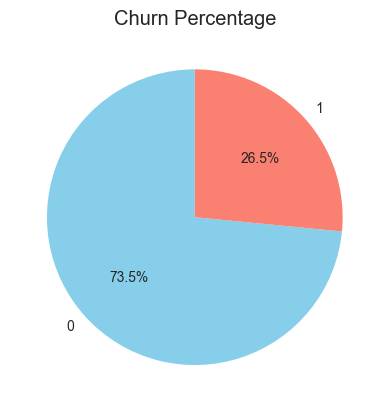

In [31]:
df['Churn Value'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.ylabel('')
plt.title('Churn Percentage')
plt.savefig(os.path.join(save_dir, "churn_percentage.png"), dpi=300, bbox_inches='tight')
plt.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler


# split Data function

In [33]:
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

# Resampling func

In [34]:
def resample_data(X, y, method='smote'):
    if method == 'undersample':
        sampler = RandomUnderSampler(random_state=42)
    elif method == 'smote':
        sampler = SMOTE(random_state=42)
    elif method == 'smoteenn':
        sampler = SMOTEENN(random_state=42)
    else:
        raise ValueError("Method must be 'undersample', 'smote', or 'smoteenn'")
    
    X_res, y_res = sampler.fit_resample(X, y)
    return X_res, y_res

# scaling func

In [35]:
def scale_data(X_train, X_test, method='standard'):
    scalers = {
        'standard': StandardScaler(),
        'minmax': MinMaxScaler(),
        'robust': RobustScaler()
    }
    scaler = scalers.get(method.lower())
    if not scaler:
        raise ValueError("Scaler must be one of: 'standard', 'minmax', or 'robust'")

    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled


# Evaluation function

In [36]:
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"\n{name} Classification Report:")
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

# modeling single models in one function

In [37]:
def run_single_models(X, y):
    sampling_methods = ['undersample', 'smote', 'smoteenn']
    scaling_methods = ['standard', 'minmax', 'robust']

    for sampler in sampling_methods:
        print(f"\n{'='*30}\nResampling Method: {sampler}\n{'='*30}")
        
        X_train, X_test, y_train, y_test = split_data(X, y)
        X_train_res, y_train_res = resample_data(X_train, y_train, method=sampler)

        for scaler in scaling_methods:
            print(f"\n--- Scaling Method: {scaler} ---")
            X_train_scaled, X_test_scaled = scale_data(X_train_res, X_test, method=scaler)
            evaluate_models(X_train_scaled, X_test_scaled, y_train_res, y_test)


Resampling Method: undersample

--- Scaling Method: standard ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409



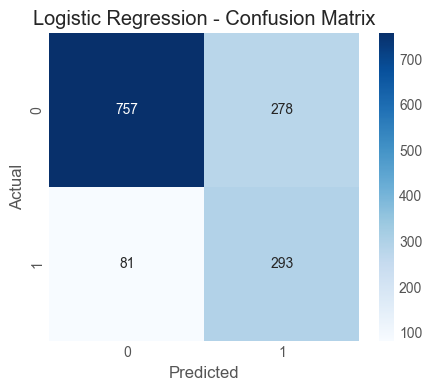


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



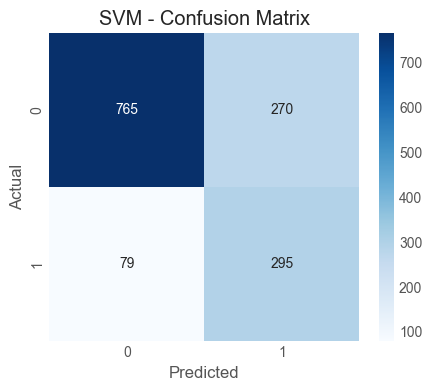


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1035
           1       0.48      0.78      0.60       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.74      1409



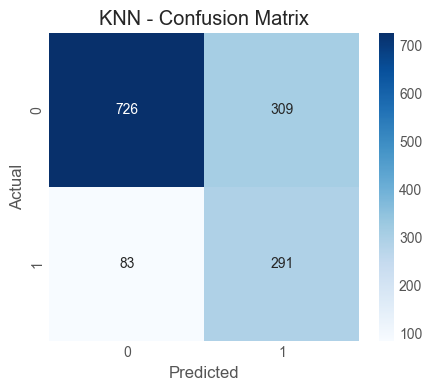


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      1035
           1       0.46      0.70      0.55       374

    accuracy                           0.70      1409
   macro avg       0.66      0.70      0.66      1409
weighted avg       0.76      0.70      0.71      1409



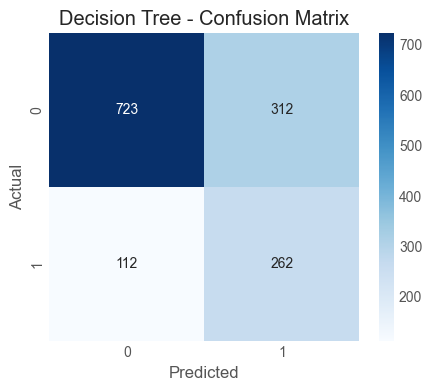


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.52      0.75      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



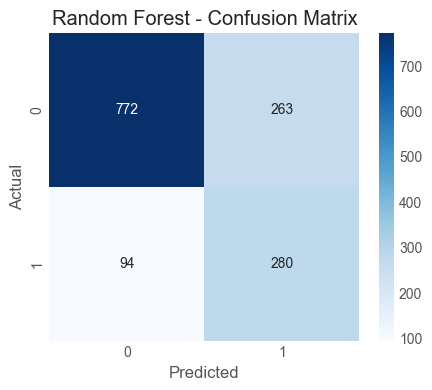


--- Scaling Method: minmax ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409



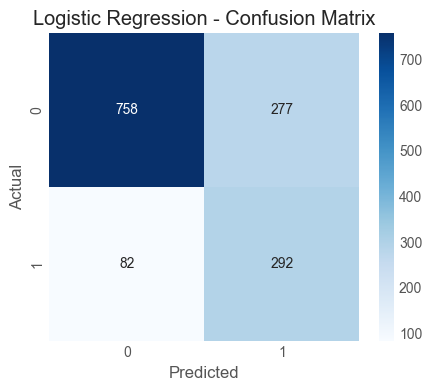


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409



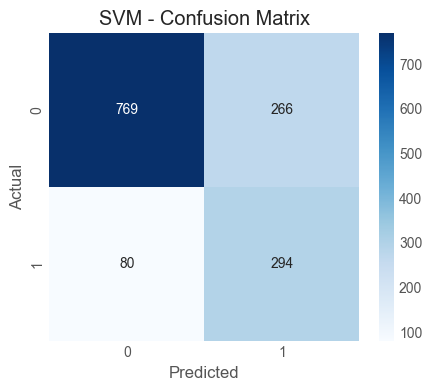


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1035
           1       0.48      0.80      0.60       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.74      1409



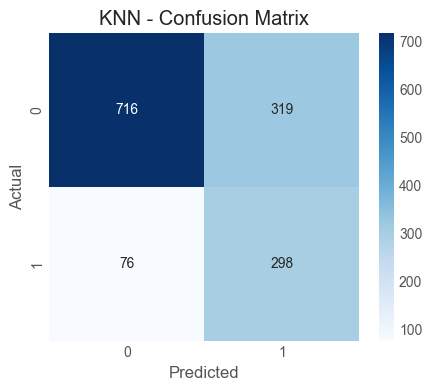


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      1035
           1       0.46      0.70      0.55       374

    accuracy                           0.70      1409
   macro avg       0.66      0.70      0.66      1409
weighted avg       0.76      0.70      0.71      1409



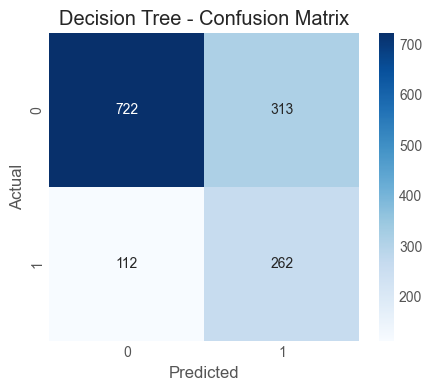


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.52      0.76      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



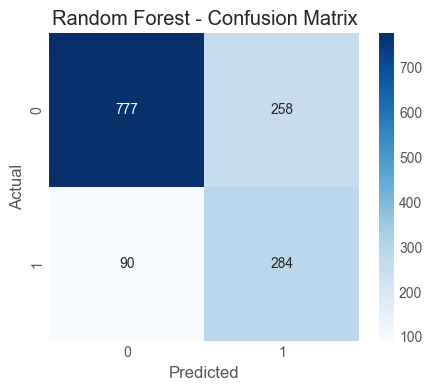


--- Scaling Method: robust ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409



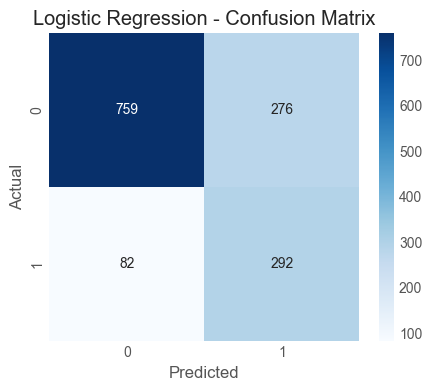


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409



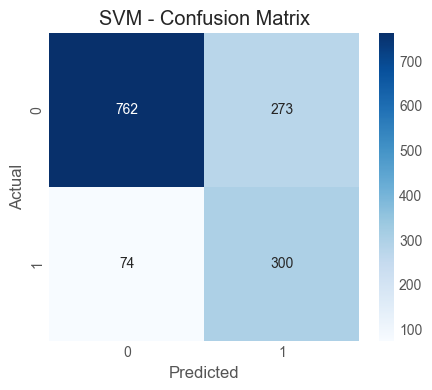


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1035
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.73      1409



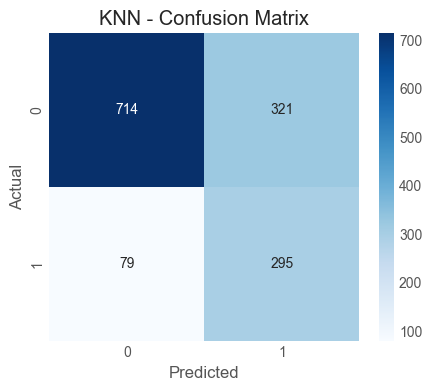


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      1035
           1       0.46      0.72      0.56       374

    accuracy                           0.70      1409
   macro avg       0.67      0.71      0.67      1409
weighted avg       0.76      0.70      0.72      1409



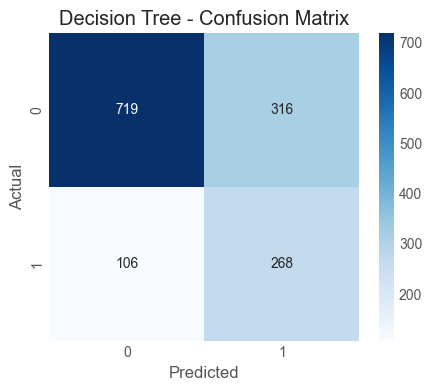


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1035
           1       0.51      0.75      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.76      1409



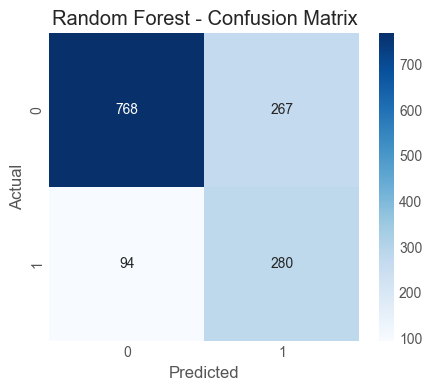


Resampling Method: smote

--- Scaling Method: standard ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.58      0.67      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409



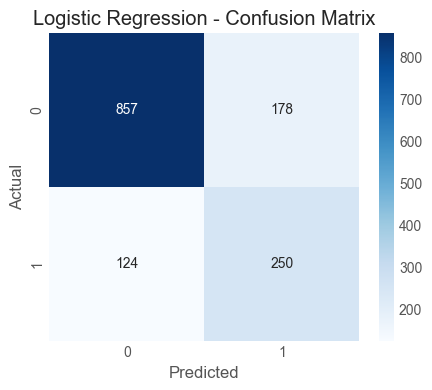


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.68      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



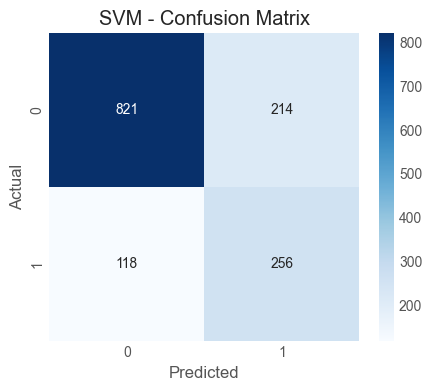


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1035
           1       0.49      0.70      0.58       374

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409



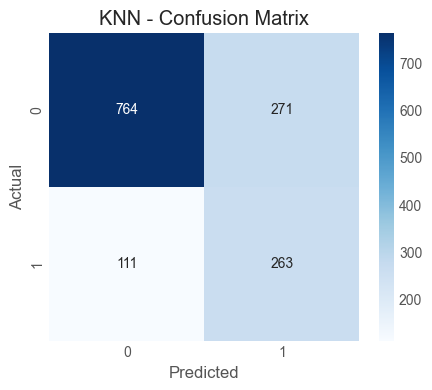


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1035
           1       0.48      0.54      0.51       374

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.73      0.72      0.73      1409



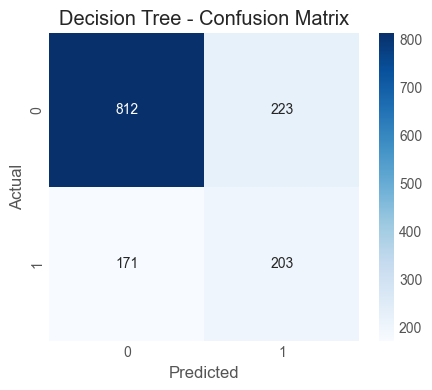


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1035
           1       0.57      0.62      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



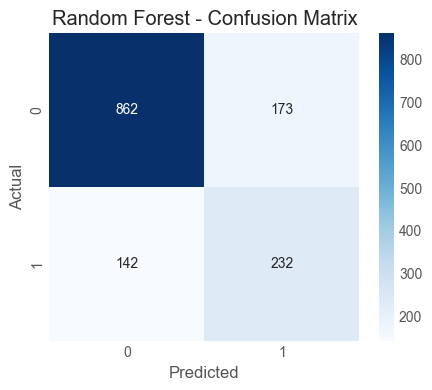


--- Scaling Method: minmax ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.57      0.68      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



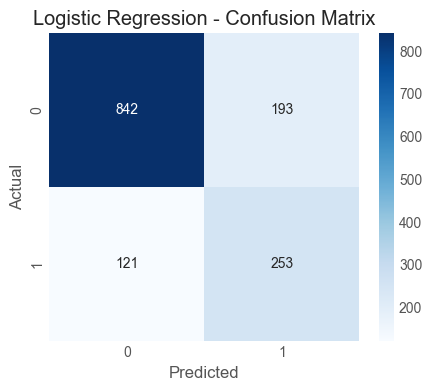


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.83      1035
           1       0.53      0.72      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



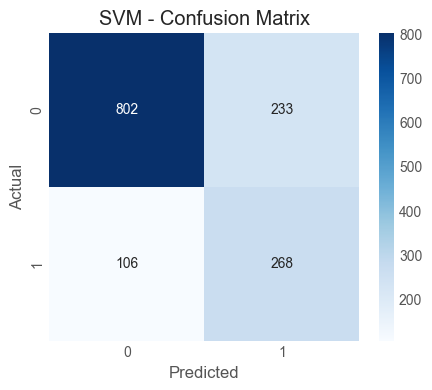


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.80      1035
           1       0.49      0.70      0.57       374

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.72      0.74      1409



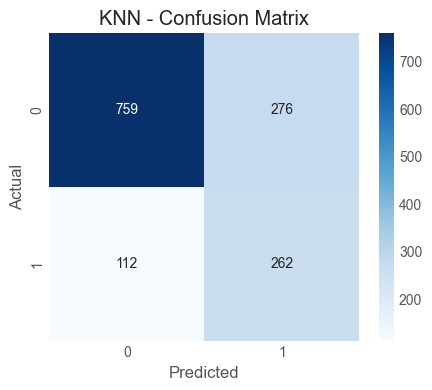


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1035
           1       0.46      0.55      0.50       374

    accuracy                           0.71      1409
   macro avg       0.64      0.66      0.65      1409
weighted avg       0.73      0.71      0.72      1409



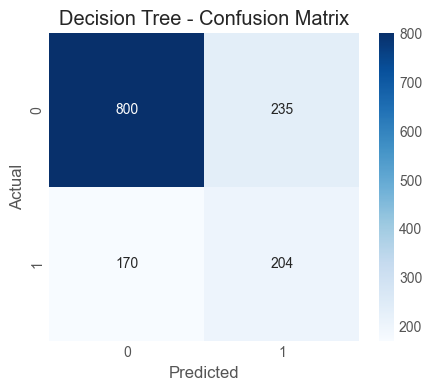


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.62      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409



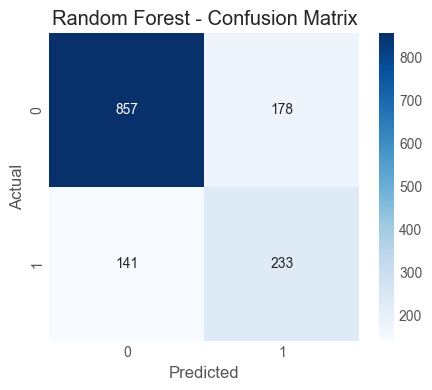


--- Scaling Method: robust ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1035
           1       0.58      0.67      0.62       374

    accuracy                           0.78      1409
   macro avg       0.73      0.75      0.73      1409
weighted avg       0.80      0.78      0.79      1409



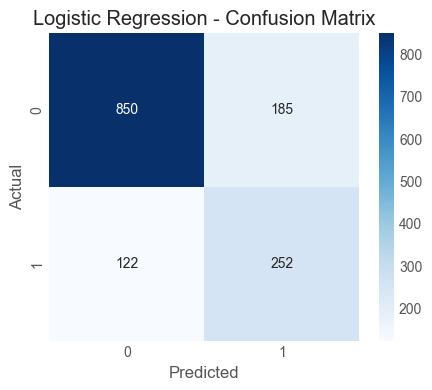


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1035
           1       0.59      0.65      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.80      0.79      0.79      1409



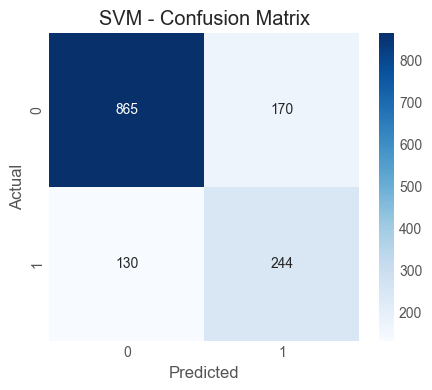


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1035
           1       0.49      0.70      0.58       374

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409



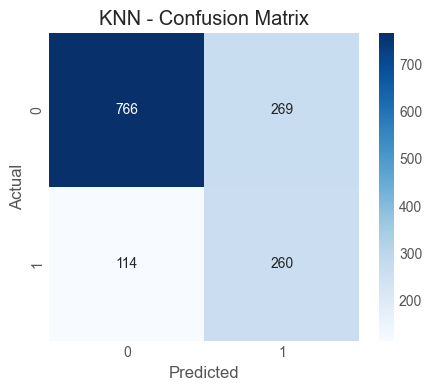


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1035
           1       0.48      0.55      0.51       374

    accuracy                           0.72      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.74      0.72      0.73      1409



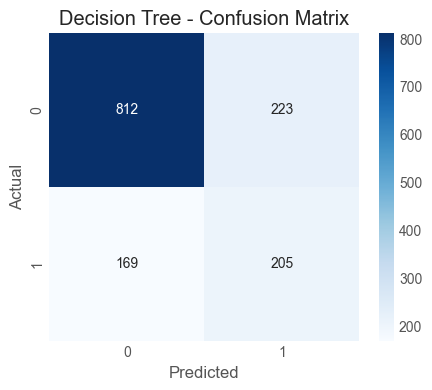


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.57      0.60      0.59       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



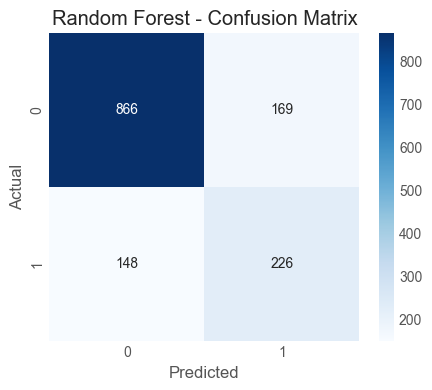


Resampling Method: smoteenn

--- Scaling Method: standard ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.49      0.81      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.74      1409



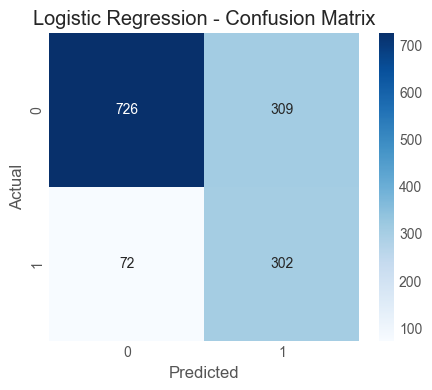


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1035
           1       0.51      0.84      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.75      1409



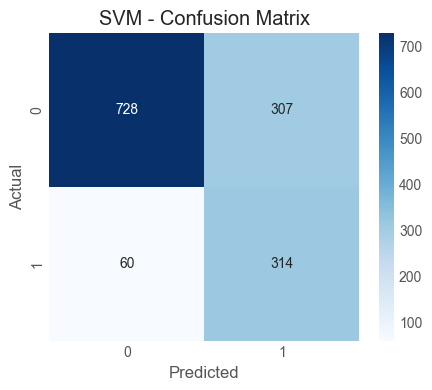


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.65      0.77      1035
           1       0.48      0.87      0.61       374

    accuracy                           0.71      1409
   macro avg       0.70      0.76      0.69      1409
weighted avg       0.81      0.71      0.73      1409



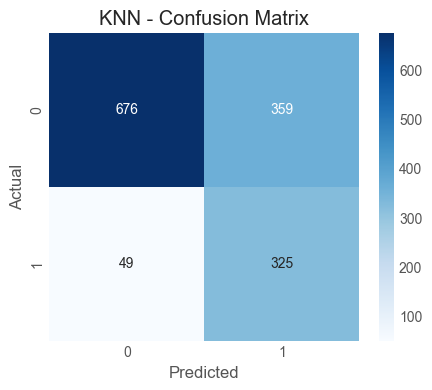


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1035
           1       0.49      0.76      0.59       374

    accuracy                           0.72      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.72      0.74      1409



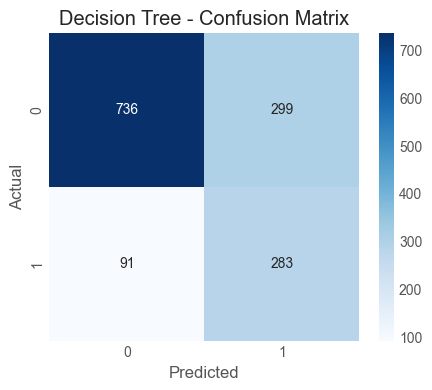


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1035
           1       0.51      0.82      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409



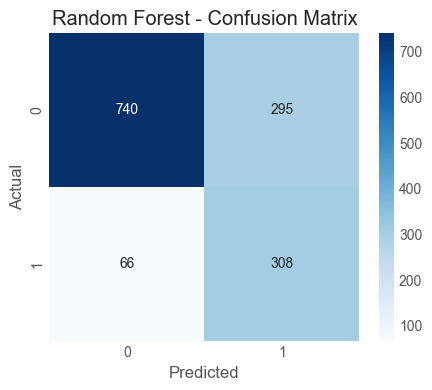


--- Scaling Method: minmax ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1035
           1       0.49      0.83      0.62       374

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.81      0.73      0.74      1409



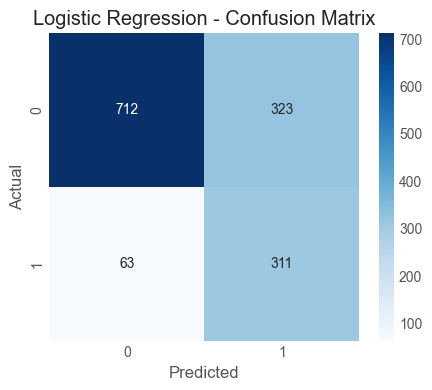


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1035
           1       0.50      0.84      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.75      1409



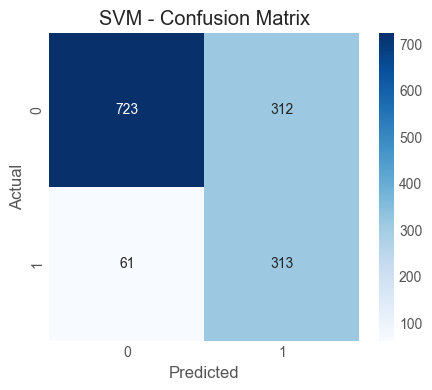


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      1035
           1       0.46      0.86      0.60       374

    accuracy                           0.69      1409
   macro avg       0.69      0.75      0.68      1409
weighted avg       0.80      0.69      0.71      1409



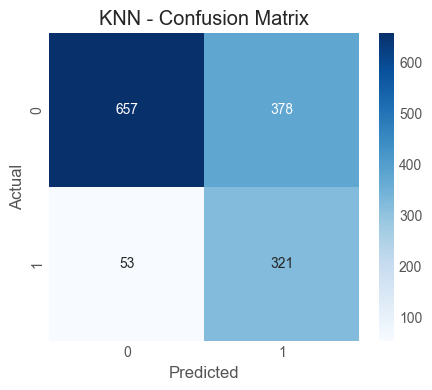


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1035
           1       0.49      0.77      0.60       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.74      1409



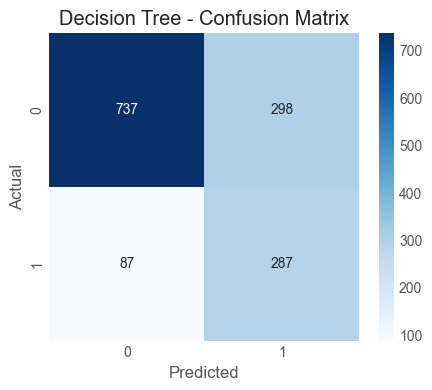


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1035
           1       0.51      0.83      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409



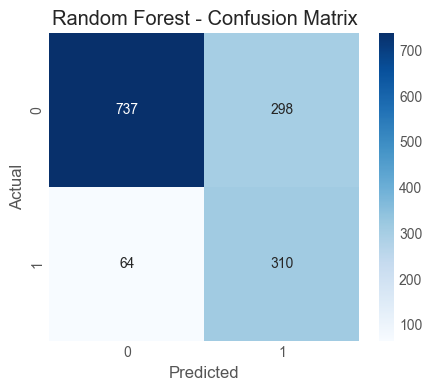


--- Scaling Method: robust ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1035
           1       0.49      0.82      0.62       374

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.80      0.73      0.74      1409



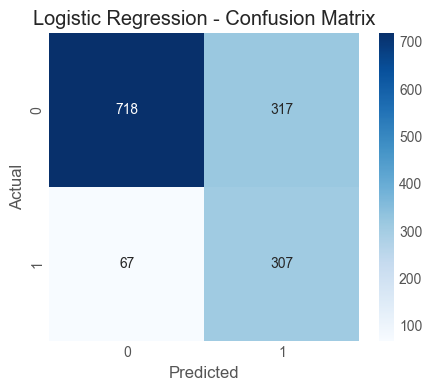


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1035
           1       0.50      0.83      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.73      0.75      1409



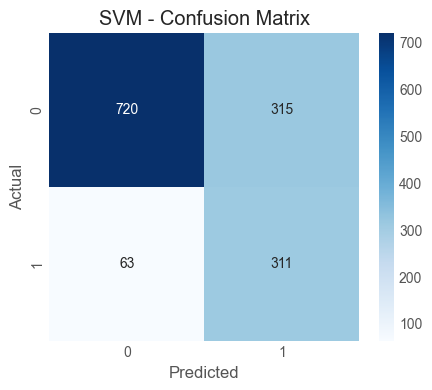


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1035
           1       0.46      0.86      0.60       374

    accuracy                           0.70      1409
   macro avg       0.69      0.75      0.68      1409
weighted avg       0.80      0.70      0.71      1409



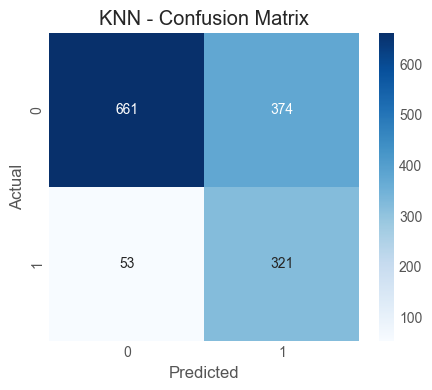


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1035
           1       0.49      0.75      0.59       374

    accuracy                           0.72      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.72      0.74      1409



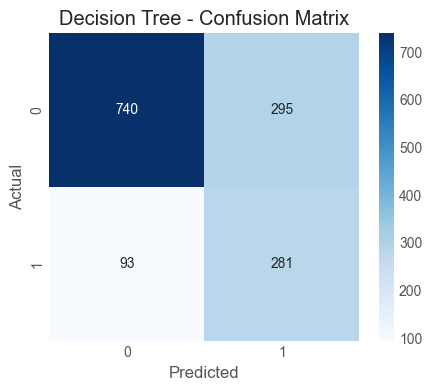


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1035
           1       0.51      0.82      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409



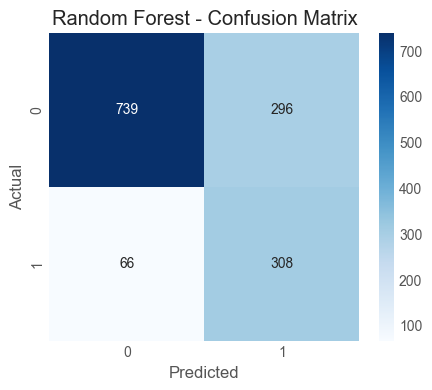

In [38]:
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']

run_single_models(X, y)

In [39]:
x = df.drop('Churn Value', axis=1)
y = df['Churn Value']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [40]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(x_test)

In [42]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier())
]

results = []
for name, model in models:
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Recall': rec,
        'Precision': prec,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print("\nModel Performance Table (Sorted by Accuracy):")
print(results_df_sorted)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.58      0.67      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1035
           1       0.47      0.55      0.51       374

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.73      0.72      0.72      1409


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.58      0.62      0.60       374

    accuracy                           0.78      1409
   macro

##### X_train_scaled , y_train_resampled -->training features
##### X_test_scaled and y_test-->test features


# apply grid seach& K-folds

# Logistic Regression

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=2000),
    param_grid=param_grid_lr,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit 
lr_grid_search.fit(X_train_scaled, y_train_resampled)

print("\nBest parameters for Logistic Regression:", lr_grid_search.best_params_)

best_lr = lr_grid_search.best_estimator_

# Predict
y_pred_lr = best_lr.predict(X_test_scaled)

print("\nTuned Logistic Regression Performance Results on Test Data:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy Score on Test Data: {accuracy_score(y_test, y_pred_lr):.4f}")

Fitting 5 folds for each of 28 candidates, totalling 140 fits

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Tuned Logistic Regression Performance Results on Test Data:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1035
           1       0.58      0.67      0.63       374

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409

Accuracy Score on Test Data: 0.7857


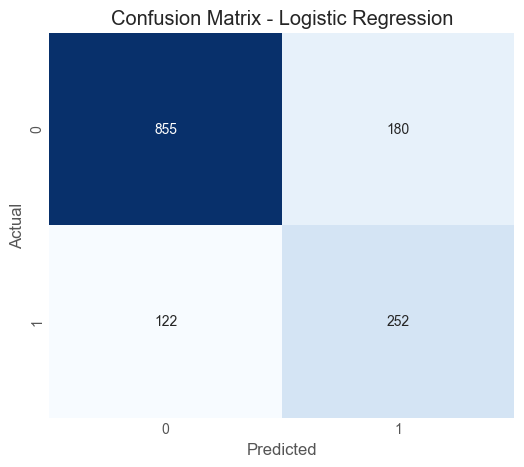

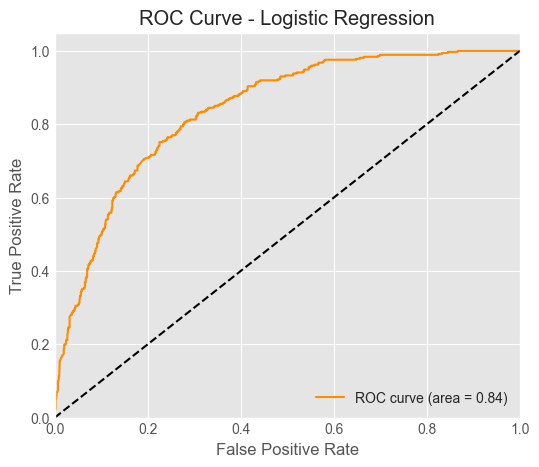

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig(os.path.join(save_dir, "confusion_matrix_logistic_regression.png"), dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve and AUC
y_prob = best_lr.predict_proba(X_test_scaled)[:,1]  # probability for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.savefig(os.path.join(save_dir, "roc_curve_logistic_regression.png"), dpi=300, bbox_inches='tight')
plt.show()

# Feature selection

# 1- forward feature selection

In [45]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Forward Selection with exactly 7 features
ffs = SequentialFeatureSelector(rf, 
                                k_features=7,  # select 7 features
                                forward=True,  
                                floating=False,
                                scoring='accuracy',
                                cv=5,
                                n_jobs=-1)

ffs = ffs.fit(X_train_scaled, y_train_resampled)

selected_features_forward = list(ffs.k_feature_idx_)
print("Forward Selection features indices:", selected_features_forward)

# Evaluate on test set
y_pred = rf.fit(X_train_scaled[:, selected_features_forward], y_train_resampled).predict(X_test_scaled[:, selected_features_forward])
print("Forward Selection Accuracy:", accuracy_score(y_test, y_pred))


Forward Selection features indices: [1, 2, 3, 5, 6, 14, 18]
Forward Selection Accuracy: 0.7331440738112136


# 2- Backward feature selection

In [46]:
# Backward Selection 7 features
bfs = SequentialFeatureSelector(rf, 
                                k_features=7,  # select 7 features
                                forward=False, 
                                floating=False,
                                scoring='accuracy',
                                cv=5,
                                n_jobs=-1)

bfs = bfs.fit(X_train_scaled, y_train_resampled)

selected_features_backward = list(bfs.k_feature_idx_)
print("Backward Selection features indices:", selected_features_backward)

# Evaluate on test set
y_pred = rf.fit(X_train_scaled[:, selected_features_backward], y_train_resampled).predict(X_test_scaled[:, selected_features_backward])
print("Backward Selection Accuracy:", accuracy_score(y_test, y_pred))


Backward Selection features indices: [1, 2, 3, 5, 12, 14, 18]
Backward Selection Accuracy: 0.7345635202271115


# lr with selected features using gridsearch

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation accuracy: 0.7803831895733906
Test Accuracy: 0.7374024130589071
Confusion Matrix:
 [[752 283]
 [ 87 287]]
ROC AUC: 0.8204383993386551


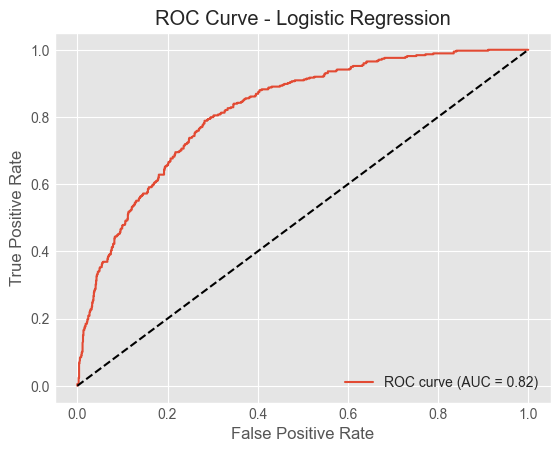

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Select only the backward-selected features
X_train_bfs = X_train_scaled[:, [2, 3, 5, 9, 10, 11, 14]]
X_test_bfs  = X_test_scaled[:, [2, 3, 5, 9, 10, 11, 14]]

# Define logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Define parameter grid for GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga']  # saga supports all penalties
}

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=lr, 
														param_grid=param_grid,
														scoring='accuracy',
														cv=cv,
														n_jobs=-1,
														verbose=1)

# Fit model
grid_search.fit(X_train_bfs, y_train_resampled)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Predict on test set
y_pred = grid_search.best_estimator_.predict(X_test_bfs)
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test_bfs)[:,1]

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# Random forest

In [48]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search_rf.fit(X_train_scaled, y_train_resampled)

print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print(f"Best CV accuracy: {grid_search_rf.best_score_:.4f}")

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

print("\nRandom Forest Classification Report on Test Data:")
print(classification_report(y_test, y_pred_rf))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best CV accuracy: 0.8465

Random Forest Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.57      0.64      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409

Test Accuracy: 0.7779


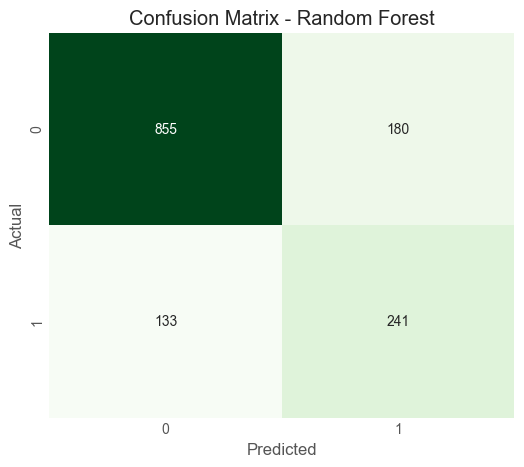

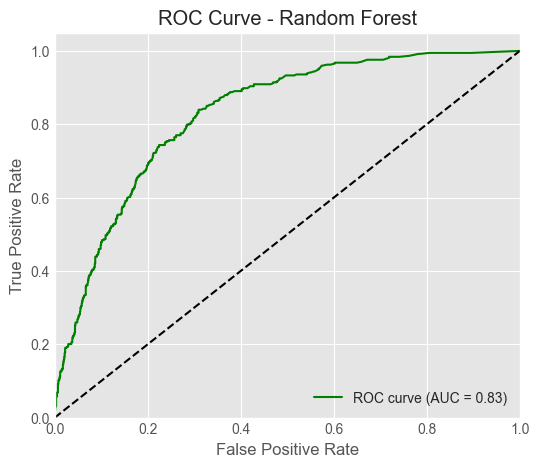

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.savefig(os.path.join(save_dir, "confusion_matrix_random_forest.png"), dpi=300, bbox_inches='tight')
plt.show()

# ROC curve and AUC
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]  # probability for positive class
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.savefig(os.path.join(save_dir, "roc_curve_random_forest.png"), dpi=300, bbox_inches='tight')
plt.show()


# aplly boosting ensemble techniques

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
def evaluate_boosting_model(model, param_grid, model_name):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train_resampled)

    print(f"\nBest parameters for {model_name}:", grid_search.best_params_)

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test_scaled)

    print(f"\n{model_name} Classification Report on Test Data:")
    print(classification_report(y_test, y_pred))
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    return best_model

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}

AdaBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1035
           1       0.56      0.74      0.64       374

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.78      1409

Test Accuracy: 0.7757


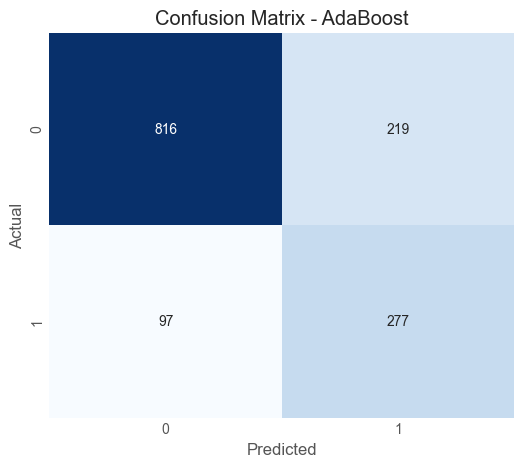

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100}

XGBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1035
           1       0.55      0.61      0.58       374

    accuracy                           0.77      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.77      0.77      1409

Test Accuracy: 0.7665


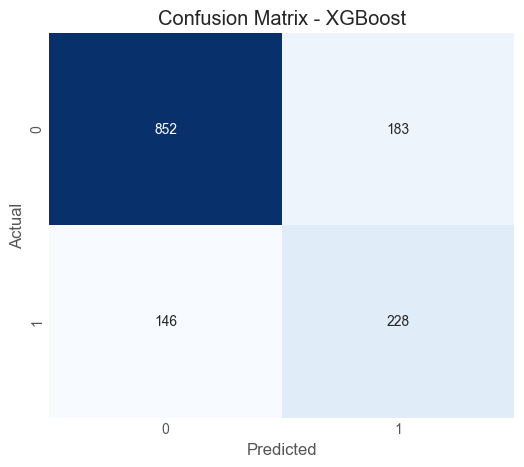

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for LightGBM: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}

LightGBM Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.58      0.59      0.59       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

Test Accuracy: 0.7771


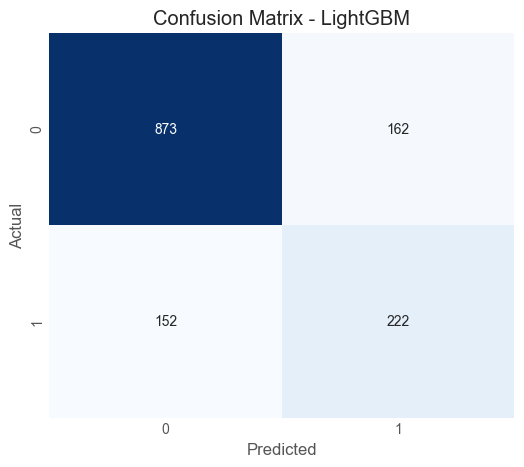

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for CatBoost: {'depth': 7, 'iterations': 200, 'learning_rate': 0.1}

CatBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.56      0.66      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

Test Accuracy: 0.7729


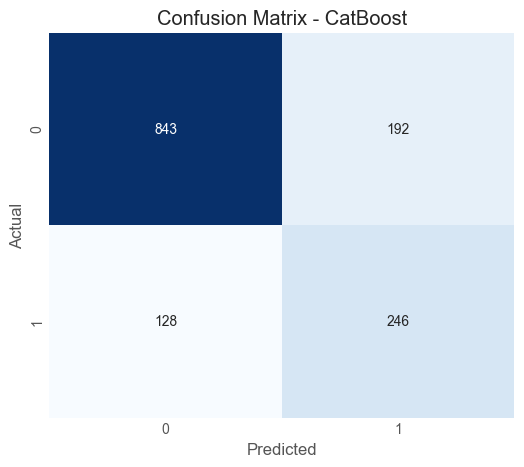

In [52]:
# AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

adaboost = AdaBoostClassifier(random_state=42)
best_adaboost = evaluate_boosting_model(adaboost, param_grid_adaboost, 'AdaBoost')

# -------
# XGBoost
param_grid_xgboost = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgboost = XGBClassifier(random_state=42, eval_metric='logloss')
best_xgboost = evaluate_boosting_model(xgboost, param_grid_xgboost, 'XGBoost')

# --------
# LightGBM
param_grid_lightgbm = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

lightgbm = lgb.LGBMClassifier(random_state=42, verbose=-1)
best_lightgbm = evaluate_boosting_model(lightgbm, param_grid_lightgbm, 'LightGBM')

# -------
# CatBoost
param_grid_catboost = {
    'iterations': [50, 100, 200],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

catboost = CatBoostClassifier(random_state=42, verbose=0)
best_catboost = evaluate_boosting_model(catboost, param_grid_catboost, 'CatBoost')

# stacking ensemble

In [53]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
def tune_rf_knn(X_train, y_train, X_test, y_test):
    # Tune Random Forest
    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
    grid_search_rf.fit(X_train, y_train)
    best_rf = grid_search_rf.best_estimator_
    print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)

    # Tune KNN
    param_grid_knn = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    knn = KNeighborsClassifier()
    grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
    grid_search_knn.fit(X_train, y_train)
    best_knn = grid_search_knn.best_estimator_
    print("\nBest parameters for KNN:", grid_search_knn.best_params_)

    return best_rf, best_knn

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best parameters for Logistic Regression (Meta Model): {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Stacking Classifier Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1035
           1       0.57      0.60      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.78      1409

Test Accuracy: 0.7736


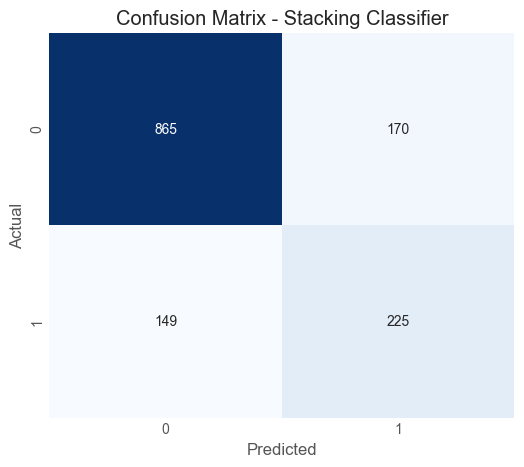

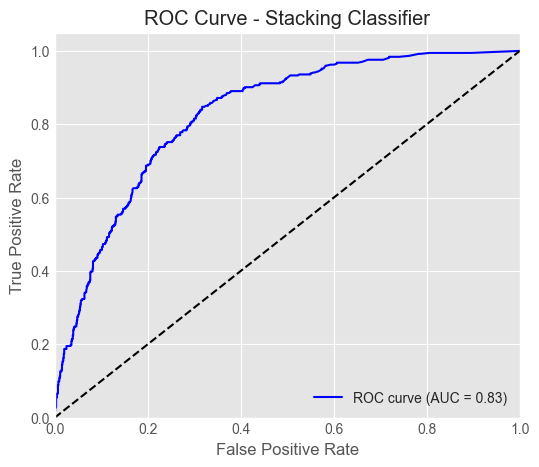

In [55]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
best_rf, best_knn = tune_rf_knn(X_train_scaled, y_train_resampled, X_test_scaled, y_test)

# Define base models
base_models = [
    ('rf', best_rf),
    ('knn', best_knn),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Tune Logistic Regression (Meta-Model)
meta_model = LogisticRegression(random_state=42, max_iter=2000)
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search_lr = GridSearchCV(estimator=meta_model, param_grid=param_grid_lr, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search_lr.fit(X_train_scaled, y_train_resampled)
best_lr = grid_search_lr.best_estimator_
print("\nBest parameters for Logistic Regression (Meta Model):", grid_search_lr.best_params_)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=best_lr, cv=5, n_jobs=-1)

# Fit the stacking model
stacking_clf.fit(X_train_scaled, y_train_resampled)

# Predict and evaluate
y_pred_stacking = stacking_clf.predict(X_test_scaled)
print("\nStacking Classifier Classification Report on Test Data:")
print(classification_report(y_test, y_pred_stacking))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_stacking):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Stacking Classifier')
plt.savefig(os.path.join(save_dir, "confusion_matrix_stacking_classifier.png"), dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve and AUC
y_prob_stacking = stacking_clf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_stacking)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend(loc='lower right')
plt.savefig(os.path.join(save_dir, "roc_curve_stacking_slassifier.png"), dpi=300, bbox_inches='tight')
plt.show()

# apply ANN

# MLP

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1035
           1       0.59      0.65      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.79      0.79      1409

Test Accuracy: 0.7864


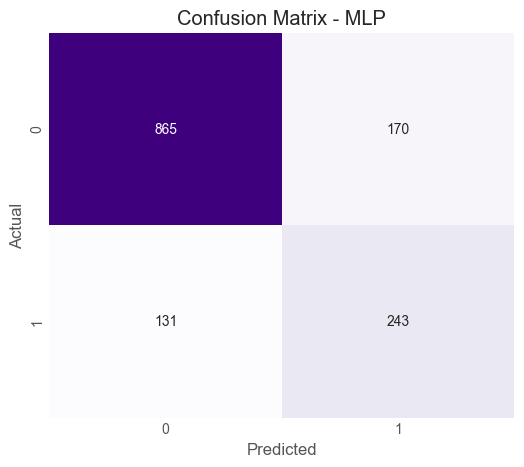

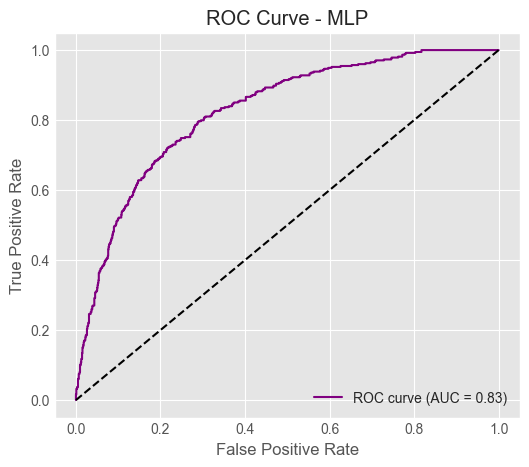

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam',
                    max_iter=500, random_state=42)

# Fit the model on training data
mlp.fit(X_train_scaled, y_train_resampled)

# Predict on test data
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluate performance
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.savefig(os.path.join(save_dir, "confusion_matrix_mlp.png"), dpi=300, bbox_inches='tight')
plt.show()

# Optional: ROC curve
y_prob_mlp = mlp.predict_proba(X_test_scaled)[:, 1]
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_prob_mlp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='purple', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP')
plt.legend(loc='lower right')
plt.savefig(os.path.join(save_dir, "roc_curve_mlp.png"), dpi=300, bbox_inches='tight')
plt.show()


# DNN

Epoch 1/100


207/207 - 2s - 7ms/step - accuracy: 0.7511 - loss: 0.4911 - val_accuracy: 0.8098 - val_loss: 0.5462 - learning_rate: 1.0000e-03
Epoch 2/100


207/207 - 0s - 2ms/step - accuracy: 0.7807 - loss: 0.4530 - val_accuracy: 0.7923 - val_loss: 0.5307 - learning_rate: 1.0000e-03
Epoch 3/100
207/207 - 0s - 2ms/step - accuracy: 0.7921 - loss: 0.4387 - val_accuracy: 0.7953 - val_loss: 0.5347 - learning_rate: 1.0000e-03
Epoch 4/100


207/207 - 0s - 2ms/step - accuracy: 0.7919 - loss: 0.4294 - val_accuracy: 0.8508 - val_loss: 0.4054 - learning_rate: 1.0000e-03
Epoch 5/100
207/207 - 0s - 2ms/step - accuracy: 0.7990 - loss: 0.4200 - val_accuracy: 0.8563 - val_loss: 0.4329 - learning_rate: 1.0000e-03
Epoch 6/100


207/207 - 0s - 2ms/step - accuracy: 0.8053 - loss: 0.4158 - val_accuracy: 0.8708 - val_loss: 0.3495 - learning_rate: 1.0000e-03
Epoch 7/100


207/207 - 0s - 2ms/step - accuracy: 0.8090 - loss: 0.4047 - val_accuracy: 0.8841 - val_loss: 0.2890 - learning_rate: 1.0000e-03
Epoch 8/100
207/207 - 0s - 2ms/step - accuracy: 0.8096 - loss: 0.4001 - val_accuracy: 0.8665 - val_loss: 0.3178 - learning_rate: 1.0000e-03
Epoch 9/100
207/207 - 0s - 2ms/step - accuracy: 0.8112 - loss: 0.3941 - val_accuracy: 0.8768 - val_loss: 0.2894 - learning_rate: 1.0000e-03
Epoch 10/100


207/207 - 0s - 2ms/step - accuracy: 0.8149 - loss: 0.3920 - val_accuracy: 0.8937 - val_loss: 0.2854 - learning_rate: 1.0000e-03
Epoch 11/100
207/207 - 0s - 2ms/step - accuracy: 0.8132 - loss: 0.3872 - val_accuracy: 0.8714 - val_loss: 0.2945 - learning_rate: 1.0000e-03
Epoch 12/100
207/207 - 0s - 2ms/step - accuracy: 0.8177 - loss: 0.3889 - val_accuracy: 0.8744 - val_loss: 0.3009 - learning_rate: 1.0000e-03
Epoch 13/100


207/207 - 0s - 2ms/step - accuracy: 0.8147 - loss: 0.3831 - val_accuracy: 0.8762 - val_loss: 0.2764 - learning_rate: 1.0000e-03
Epoch 14/100


207/207 - 0s - 2ms/step - accuracy: 0.8209 - loss: 0.3783 - val_accuracy: 0.8967 - val_loss: 0.2417 - learning_rate: 1.0000e-03
Epoch 15/100
207/207 - 0s - 2ms/step - accuracy: 0.8197 - loss: 0.3807 - val_accuracy: 0.8877 - val_loss: 0.2570 - learning_rate: 1.0000e-03
Epoch 16/100
207/207 - 0s - 2ms/step - accuracy: 0.8174 - loss: 0.3786 - val_accuracy: 0.8829 - val_loss: 0.2601 - learning_rate: 1.0000e-03
Epoch 17/100


207/207 - 0s - 2ms/step - accuracy: 0.8209 - loss: 0.3772 - val_accuracy: 0.8883 - val_loss: 0.2348 - learning_rate: 1.0000e-03
Epoch 18/100
207/207 - 0s - 2ms/step - accuracy: 0.8171 - loss: 0.3757 - val_accuracy: 0.8774 - val_loss: 0.2639 - learning_rate: 1.0000e-03
Epoch 19/100
207/207 - 0s - 2ms/step - accuracy: 0.8233 - loss: 0.3711 - val_accuracy: 0.8750 - val_loss: 0.2718 - learning_rate: 1.0000e-03
Epoch 20/100
207/207 - 0s - 2ms/step - accuracy: 0.8224 - loss: 0.3730 - val_accuracy: 0.8835 - val_loss: 0.2482 - learning_rate: 1.0000e-03
Epoch 21/100
207/207 - 0s - 2ms/step - accuracy: 0.8223 - loss: 0.3691 - val_accuracy: 0.8696 - val_loss: 0.2548 - learning_rate: 1.0000e-03
Epoch 22/100
207/207 - 0s - 2ms/step - accuracy: 0.8235 - loss: 0.3685 - val_accuracy: 0.8877 - val_loss: 0.2457 - learning_rate: 1.0000e-03
Epoch 23/100
207/207 - 0s - 2ms/step - accuracy: 0.8283 - loss: 0.3626 - val_accuracy: 0.8841 - val_loss: 0.2491 - learning_rate: 5.0000e-04
Epoch 24/100
207/207 - 0s 

207/207 - 0s - 2ms/step - accuracy: 0.8245 - loss: 0.3613 - val_accuracy: 0.8895 - val_loss: 0.2280 - learning_rate: 5.0000e-04
Epoch 26/100


207/207 - 0s - 2ms/step - accuracy: 0.8294 - loss: 0.3572 - val_accuracy: 0.8883 - val_loss: 0.2228 - learning_rate: 5.0000e-04
Epoch 27/100
207/207 - 0s - 1ms/step - accuracy: 0.8303 - loss: 0.3574 - val_accuracy: 0.8913 - val_loss: 0.2333 - learning_rate: 5.0000e-04
Epoch 28/100
207/207 - 0s - 1ms/step - accuracy: 0.8288 - loss: 0.3582 - val_accuracy: 0.8901 - val_loss: 0.2272 - learning_rate: 5.0000e-04
Epoch 29/100
207/207 - 0s - 1ms/step - accuracy: 0.8301 - loss: 0.3563 - val_accuracy: 0.8901 - val_loss: 0.2247 - learning_rate: 5.0000e-04
Epoch 30/100
207/207 - 0s - 1ms/step - accuracy: 0.8325 - loss: 0.3571 - val_accuracy: 0.8877 - val_loss: 0.2364 - learning_rate: 5.0000e-04
Epoch 31/100


207/207 - 0s - 2ms/step - accuracy: 0.8303 - loss: 0.3576 - val_accuracy: 0.8973 - val_loss: 0.2187 - learning_rate: 5.0000e-04
Epoch 32/100
207/207 - 0s - 2ms/step - accuracy: 0.8307 - loss: 0.3536 - val_accuracy: 0.9046 - val_loss: 0.2221 - learning_rate: 5.0000e-04
Epoch 33/100
207/207 - 0s - 2ms/step - accuracy: 0.8312 - loss: 0.3542 - val_accuracy: 0.8889 - val_loss: 0.2278 - learning_rate: 5.0000e-04
Epoch 34/100
207/207 - 0s - 1ms/step - accuracy: 0.8297 - loss: 0.3564 - val_accuracy: 0.8889 - val_loss: 0.2522 - learning_rate: 5.0000e-04
Epoch 35/100
207/207 - 0s - 2ms/step - accuracy: 0.8331 - loss: 0.3539 - val_accuracy: 0.8859 - val_loss: 0.2338 - learning_rate: 5.0000e-04
Epoch 36/100
207/207 - 0s - 2ms/step - accuracy: 0.8303 - loss: 0.3530 - val_accuracy: 0.8931 - val_loss: 0.2204 - learning_rate: 5.0000e-04
Epoch 37/100
207/207 - 0s - 2ms/step - accuracy: 0.8372 - loss: 0.3480 - val_accuracy: 0.8925 - val_loss: 0.2200 - learning_rate: 2.5000e-04
Epoch 38/100
207/207 - 0s 

207/207 - 0s - 2ms/step - accuracy: 0.8322 - loss: 0.3463 - val_accuracy: 0.8937 - val_loss: 0.2178 - learning_rate: 2.5000e-04
Epoch 42/100
207/207 - 0s - 2ms/step - accuracy: 0.8380 - loss: 0.3471 - val_accuracy: 0.8937 - val_loss: 0.2187 - learning_rate: 2.5000e-04
Epoch 43/100
207/207 - 0s - 2ms/step - accuracy: 0.8381 - loss: 0.3447 - val_accuracy: 0.9070 - val_loss: 0.2210 - learning_rate: 2.5000e-04
Epoch 44/100
207/207 - 0s - 2ms/step - accuracy: 0.8334 - loss: 0.3466 - val_accuracy: 0.8907 - val_loss: 0.2305 - learning_rate: 2.5000e-04
Epoch 45/100
207/207 - 0s - 2ms/step - accuracy: 0.8363 - loss: 0.3437 - val_accuracy: 0.9028 - val_loss: 0.2214 - learning_rate: 2.5000e-04
Epoch 46/100
207/207 - 0s - 2ms/step - accuracy: 0.8366 - loss: 0.3448 - val_accuracy: 0.8973 - val_loss: 0.2236 - learning_rate: 2.5000e-04
Epoch 47/100
207/207 - 0s - 1ms/step - accuracy: 0.8345 - loss: 0.3434 - val_accuracy: 0.9052 - val_loss: 0.2188 - learning_rate: 1.2500e-04
Epoch 48/100
207/207 - 0s 

207/207 - 0s - 2ms/step - accuracy: 0.8355 - loss: 0.3430 - val_accuracy: 0.9082 - val_loss: 0.2143 - learning_rate: 1.2500e-04
Epoch 51/100
207/207 - 0s - 1ms/step - accuracy: 0.8380 - loss: 0.3400 - val_accuracy: 0.9040 - val_loss: 0.2202 - learning_rate: 1.2500e-04
Epoch 52/100
207/207 - 0s - 1ms/step - accuracy: 0.8389 - loss: 0.3409 - val_accuracy: 0.9046 - val_loss: 0.2165 - learning_rate: 1.2500e-04
Epoch 53/100


207/207 - 0s - 2ms/step - accuracy: 0.8411 - loss: 0.3387 - val_accuracy: 0.9040 - val_loss: 0.2135 - learning_rate: 1.2500e-04
Epoch 54/100
207/207 - 0s - 2ms/step - accuracy: 0.8375 - loss: 0.3385 - val_accuracy: 0.8973 - val_loss: 0.2178 - learning_rate: 1.2500e-04
Epoch 55/100
207/207 - 0s - 2ms/step - accuracy: 0.8428 - loss: 0.3381 - val_accuracy: 0.8937 - val_loss: 0.2219 - learning_rate: 1.2500e-04
Epoch 56/100
207/207 - 0s - 2ms/step - accuracy: 0.8363 - loss: 0.3389 - val_accuracy: 0.8955 - val_loss: 0.2193 - learning_rate: 1.2500e-04
Epoch 57/100
207/207 - 0s - 2ms/step - accuracy: 0.8371 - loss: 0.3357 - val_accuracy: 0.9046 - val_loss: 0.2174 - learning_rate: 1.2500e-04
Epoch 58/100
207/207 - 0s - 2ms/step - accuracy: 0.8405 - loss: 0.3344 - val_accuracy: 0.9040 - val_loss: 0.2168 - learning_rate: 1.2500e-04
Epoch 59/100
207/207 - 0s - 2ms/step - accuracy: 0.8381 - loss: 0.3375 - val_accuracy: 0.9052 - val_loss: 0.2194 - learning_rate: 6.2500e-05
Epoch 60/100
207/207 - 0s 

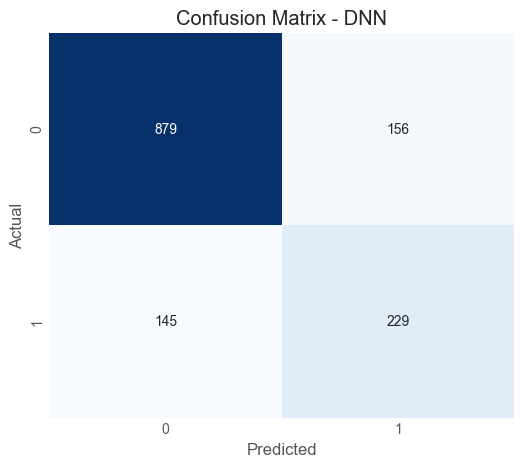

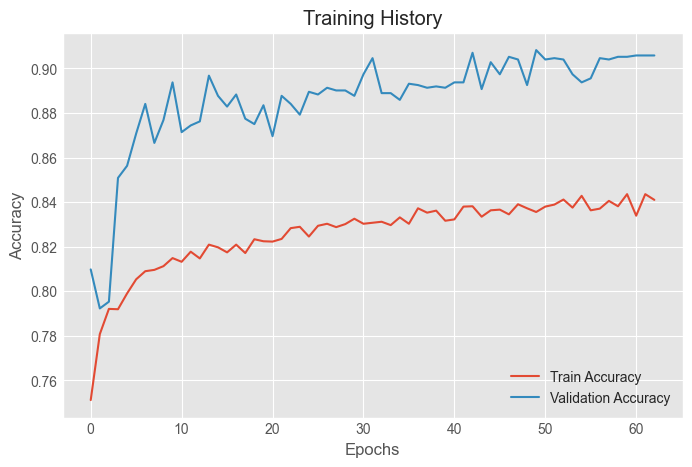

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the DNN model
input_dim = X_train_scaled.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
checkpoint = ModelCheckpoint('./app/best_dnn_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train_resampled,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=2
)

# Evaluate on test data
y_pred_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("DNN Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - DNN')
plt.savefig(os.path.join(save_dir, "confusion_matrix_dnn.png"), dpi=300, bbox_inches='tight')
plt.show()

# Optional: Plot training history
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.savefig(os.path.join(save_dir, "training_history_dnn.png"), dpi=300, bbox_inches='tight')
plt.show()

In [58]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Numeric columns (order matches training data)
numeric_cols = ['Tenure Months', 'Monthly Charges', 'Sum_Of_Services']

# Categorical columns (order matches training data)
categorical_encoded_cols = [
    'Senior Citizen', 'Partner', 'Dependents', 'Paperless Billing',
    'Internet Service_Fiber optic', 'Internet Service_No',
    'Online Security_Yes', 'Online Backup_Yes', 'Device Protection_Yes',
    'Tech Support_Yes', 'Streaming TV_Yes', 'Streaming Movies_Yes',
    'Tenure Category_Old_Customers', 'Contract_One year',
    'Contract_Two year', 'Is Manual Payment'
]

# Preprocessor: Scale numeric columns, pass categorical columns as-is
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', 'passthrough', categorical_encoded_cols)
])

# Build the pipeline with preprocessor + model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_lr)
])

# Train the pipeline
pipeline.fit(X_train_resampled, y_train_resampled)

# Save the trained pipeline to file
joblib.dump(pipeline, "./app/best_pipeline.pkl")

['./app/best_pipeline.pkl']

# The End... ✅